In [ ]:
//@version=5
//xauusd OANDA
indicator("v2", overlay = true, max_labels_count = 300, max_lines_count = 300, max_boxes_count = 300, max_bars_back = 300)

//68 Candle Logic

// === Inputs ===
bCol = input.color(#089981, title="Bull Border")
rCol = input.color(color.red, title="Bear Border")
bgB = input.color(color.new(#089981, 20), title="Bull Body")
bgR = input.color(color.new(#ff5252, 20), title="Bear Body")

// === Default Daily Candle (6:00 AM) ===
dO = request.security(syminfo.tickerid, "D", open)
dH = request.security(syminfo.tickerid, "D", high)
dL = request.security(syminfo.tickerid, "D", low)
dC = request.security(syminfo.tickerid, "D", close)

dBull = dC >= dO
dCol = dBull ? bCol : rCol
dBg = dBull ? bgB : bgR

ofs = 30
bw = 6
rIdx = bar_index + ofs + bw / 2
lIdx = bar_index + ofs - bw / 2
xMid = int(bar_index + ofs)

// Body
var box dBx = na
box.delete(dBx)
tB = math.max(dO, dC)
bB = math.min(dO, dC)
dBx := box.new(left=int(lIdx), right=int(rIdx), top=tB, bottom=bB, border_color=dCol, bgcolor=dBg)

// Wicks
var line dW1 = na
var line dW2 = na
line.delete(dW1)
line.delete(dW2)
dW1 := line.new(x1=xMid, y1=dH, x2=xMid, y2=tB, color=dCol)
dW2 := line.new(x1=xMid, y1=bB, x2=xMid, y2=dL, color=dCol)

// Labels
var label lblO = na
var label lblH = na
var label lblL = na
var label lblC = na
label.delete(lblO)
label.delete(lblH)
label.delete(lblL)
label.delete(lblC)

lblStyle = label.style_label_right
lblSize = size.tiny
lblOfs = -2

lblO := label.new(x=xMid + lblOfs, y=dO, text="6O " + str.tostring(dO, format.mintick), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)
lblH := label.new(x=xMid + lblOfs, y=dH, text="6H " + str.tostring(dH, format.mintick), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)
lblL := label.new(x=xMid + lblOfs, y=dL, text="6L " + str.tostring(dL, format.mintick), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)
lblC := label.new(x=xMid + lblOfs, y=dC, text="6C " + str.tostring(dC, format.mintick), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)

// Open lines
var line moL = na
line.delete(moL)
var line moH = na
line.delete(moH)
var line moLw = na
line.delete(moLw)

moL := line.new(x1=bar_index - 500, y1=dO, x2=xMid, y2=dO, color=color.rgb(0, 0, 0, 80), style=line.style_dotted, width=1)
moH := line.new(x1=bar_index - 500, y1=dL, x2=xMid, y2=dL, color=color.rgb(0, 0, 0, 50), style=line.style_dotted, width=1)
moLw := line.new(x1=bar_index - 500, y1=dH, x2=xMid, y2=dH, color=color.rgb(0, 0, 0, 50), style=line.style_dotted, width=1)

// === Custom Daily Candle (8:00 AM Manila) ===
sh = 24
sm = 0
st = timestamp("UTC", year, month, dayofmonth, sh, sm)

var float cO = na
var float cH = na
var float cL = na
var float cC = na

if (time == st)
    cO := open
    cH := high
    cL := low
    cC := close

if (not na(cO))
    cH := math.max(cH, high)
    cL := math.min(cL, low)
    cC := close

cBull = cC >= cO
cCol = cBull ? bCol : rCol
cBg = cBull ? bgB : bgR

cOfs = 37
cbw = 6
crIdx = bar_index + cOfs + cbw / 2
clIdx = bar_index + cOfs - cbw / 2
cX = int(bar_index + cOfs)

// Custom body
var box cBx = na
box.delete(cBx)
ctB = math.max(cO, cC)
cbB = math.min(cO, cC)
cBx := box.new(left=int(clIdx), right=int(crIdx), top=ctB, bottom=cbB, border_color=cCol, bgcolor=cBg)

// Custom wicks
var line cW1 = na
var line cW2 = na
line.delete(cW1)
line.delete(cW2)
cW1 := line.new(x1=cX, y1=cH, x2=cX, y2=ctB, color=cCol)
cW2 := line.new(x1=cX, y1=cbB, x2=cX, y2=cL, color=cCol)

// Custom labels
var label clO = na
var label clH = na
var label clL = na
var label clC = na
label.delete(clO)
label.delete(clH)
label.delete(clL)
label.delete(clC)

clStyle = label.style_label_left
clSize = size.tiny
clOfs = 2

clO := label.new(x=cX + clOfs, y=cO, text="8O " + str.tostring(cO, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
clH := label.new(x=cX + clOfs, y=cH, text="8H " + str.tostring(cH, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
clL := label.new(x=cX + clOfs, y=cL, text="8L " + str.tostring(cL, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
clC := label.new(x=cX + clOfs, y=cC, text="8C " + str.tostring(cC, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)

// Custom open lines
var line cMoL = na
line.delete(cMoL)
var line cMoH = na
line.delete(cMoH)
var line cMoLw = na
line.delete(cMoLw)

cMoL := line.new(x1=bar_index - 500, y1=cO, x2=cX, y2=cO, color=color.rgb(255, 0, 0, 80), style=line.style_dotted, width=1)
cMoH := line.new(x1=bar_index - 500, y1=cH, x2=cX, y2=cH, color=color.rgb(255, 0, 0, 50), style=line.style_dotted, width=1)
cMoLw := line.new(x1=bar_index - 500, y1=cL, x2=cX, y2=cL, color=color.rgb(255, 0, 0, 50), style=line.style_dotted, width=1)

// Date Label
var label cDt = na
label.delete(cDt)

cYOfs = (cH - cL) * 0.05
cLblY = cH + cYOfs

cDt := label.new(x=cX + clOfs, y=cC + 6, text=str.tostring(dayofmonth) + "/" + str.tostring(month) + "/" + str.tostring(year), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)

// TF Label
var label tfLbl = na
label.delete(tfLbl)
var label tfLbl2 = na
label.delete(tfLbl2)

tfS = ""
if (str.length(timeframe.period) > 1 and str.substring(timeframe.period, str.length(timeframe.period)-1, str.length(timeframe.period)) == "m")
    tfS := "m"
else if (str.length(timeframe.period) > 1 and str.substring(timeframe.period, str.length(timeframe.period)-1, str.length(timeframe.period)) == "h")
    tfS := "h"

tfP = str.replace(timeframe.period, tfS, "")
tfText = tfP + tfS + "m to 1D"

tfLbl := label.new(x=cX + clOfs, y=cC - 3, text=tfText, style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
tfLbl2 := label.new(x=cX + clOfs, y=cC - 2, text="Candle Type:", style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)

// Range Labels
dHL = math.abs(dH - dL)
dOC = math.abs(dO - dC)
cHL = math.abs(cH - cL)
cOC = math.abs(cO - cC)

var label dHLlbl = na
var label dOClbl = na
label.delete(dHLlbl)
label.delete(dOClbl)

var label cHLlbl = na
var label cOClbl = na
label.delete(cHLlbl)
label.delete(cOClbl)

var label dRange = na
var label cRange = na
label.delete(dRange)
label.delete(cRange)

dRange := label.new(x=cX + clOfs, y=cC + 10, text="6am Range", style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
dHLlbl := label.new(x=cX + clOfs, y=cC + 9, text="6HL: $" + str.tostring(dHL, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
dOClbl := label.new(x=cX + clOfs, y=cC + 8, text="6OC: $" + str.tostring(dOC, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
cRange := label.new(x=cX + clOfs, y=cC + 4, text="8am Range", style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
cHLlbl := label.new(x=cX + clOfs, y=cC + 3, text="8HL: $" + str.tostring(cHL, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
cOClbl := label.new(x=cX + clOfs, y=cC + 2, text="8OC: $" + str.tostring(cOC, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)

// UTC/UTC+8 Time
var label utcLbl = na
var label utc8Lbl = na
label.delete(utcLbl)
label.delete(utc8Lbl)

utcStr = "UTC: " + str.tostring(hour, "00") + ":" + str.tostring(minute, "00")
utc8H = (hour + 12) % 24
utc8Str = "UTC: " + str.tostring(utc8H, "00") + ":" + str.tostring(minute, "00")

utc8Lbl := label.new(x=cX + clOfs, y=cC + 13, text=utc8Str, style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
utcLbl := label.new(x=cX + clOfs, y=cC + 12, text=utcStr, style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)

//Daily highlight logic
// Define the time conditions for specified key hours in UTC+8
A = (hour == 14 and minute == 0)         // 2:00 am
C = (hour == 18 and minute == 0)        // 6:00 AM next day
F = (hour == 18 and minute == 6)        // 6:03 AM next day
D = (hour == 20 and minute == 0)       // 8:00 AM next day
E = (hour == 8 and minute == 30)       // 8:00 PM next day

// Only proceed if chart is 3-minute timeframe AMD 
is3min = timeframe.period == "3"
// Define time-based conditions
B = (hour == 5 and minute == 0)        // X
G = (hour == 6 and minute == 30)       // A
H = (hour == 8 and minute == 0)        // M
I = (hour == 9 and minute == 30)       // D
J = (hour == 11 and minute == 0)       // X

AMD = B or G or H or I or J

// Apply background color only on 3-minute timeframe
bgcolor(is3min and AMD ? color.new(#000000, 98) : na)

// Draw horizontal lines 
var line OpenLine = na
var label OpenLabel = na

if D //8am
    OpenLine := line.new(x1=bar_index, y1=open, x2=bar_index + 14, y2=open, extend=extend.none, color=color.black, width=1)
    OpenLabel := label.new(x=bar_index + 15, y=open, text="8AM " + str.tostring(open, format.mintick), style=label.style_label_left, textcolor=color.black, size=size.tiny, color=color.rgb(54, 58, 69, 100))
// Optional: Add a line and label for 4:30 AM
if C //6am
    OpenLine := line.new(x1=bar_index, y1=open, x2=bar_index + 14, y2=open, extend=extend.none, color=color.red, width=1)
    OpenLabel := label.new(x=bar_index + 15, y=open, text="6AM " + str.tostring(open, format.mintick), style=label.style_label_left, textcolor=color.red, size=size.tiny, color=color.rgb(54, 58, 69, 100))
if A //2am
    OpenLine := line.new(x1=bar_index, y1=close, x2=bar_index + 6, y2=close, extend=extend.none, color=color.blue, width=1)
    OpenLabel := label.new(x=bar_index + 6, y=close, text="2AM " + str.tostring(close, format.mintick), style=label.style_label_left, textcolor=color.blue, size=size.tiny, color=color.rgb(54, 58, 69, 100))
if E //8pm
    OpenLine := line.new(x1=bar_index, y1=open, x2=bar_index + 6, y2=open, extend=extend.none, color=color.orange, width=1)
    OpenLabel := label.new(x=bar_index + 6, y=open, text="8PM " + str.tostring(open, format.mintick), style=label.style_label_left, textcolor=color.orange, size=size.tiny, color=color.rgb(54, 58, 69, 100))
// Combine all key hour conditions
if F //8pm
    OpenLine := line.new(x1=bar_index, y1=open, x2=bar_index + 14, y2=open, extend=extend.none, color=color.red, width=1)
    OpenLabel := label.new(x=bar_index + 15, y=open, text="6:03AM " + str.tostring(open, format.mintick), style=label.style_label_left, textcolor=color.red, size=size.tiny, color=color.rgb(54, 58, 69, 100))
// Combine all key hour conditions
Highlight = C or D or F

// Highlight the key hour candles with a subtle color
bgcolor(Highlight ? color.new(color.gray, 90) : na)
bgcolor(D? color.new(#363a45, 75) : na)

// Determine bullish or bearish candles at key hours (currently unused)
isBullish = close > open
isBearish = close < open

//-----------
iis3min = timeframe.period == "3"  ///this function not in used

// Helper function to check time ranges
inTimeRange(startHour, startMin, endHour, endMin) =>
    t = timestamp("Asia/Manila", year, month, dayofmonth, hour, minute)
    startT = timestamp("Asia/Manila", year, month, dayofmonth, startHour, startMin)
    endT = timestamp("Asia/Manila", year, month, dayofmonth, endHour, endMin)
    t >= startT and t < endT

// Intervals
inA = inTimeRange(5, 0, 6, 30)
inM = inTimeRange(6, 30, 8, 0)
inD = inTimeRange(8, 0, 9, 30)
inX = inTimeRange(9, 30, 11, 0)

// Create and update boxes based on intervals
var box boxA = na
var box boxM = na
var box boxD = na
var box boxX = na

if is3min and inA
    if na(boxA)
        boxA := box.new(left=bar_index, right=bar_index, top=high, bottom=low, bgcolor=color.new(color.blue, 85), border_color=color.rgb(255, 255, 255, 100), text="A", text_color=color.white, text_size=size.large)
    else
        box.set_right(boxA, bar_index)
        box.set_top(boxA, math.max(box.get_top(boxA), high))
        box.set_bottom(boxA, math.min(box.get_bottom(boxA), low))
else
    boxA := na

if is3min and inM
    if na(boxM)
        boxM := box.new(left=bar_index, right=bar_index, top=high, bottom=low, bgcolor=color.new(color.green, 85), border_color=color.rgb(255, 255, 255, 100), text="M", text_color=color.white, text_size=size.large)
    else
        box.set_right(boxM, bar_index)
        box.set_top(boxM, math.max(box.get_top(boxM), high))
        box.set_bottom(boxM, math.min(box.get_bottom(boxM), low))
else
    boxM := na

if is3min and inD
    if na(boxD)
        boxD := box.new(left=bar_index, right=bar_index, top=high, bottom=low, bgcolor=color.new(color.orange, 85), border_color=color.rgb(255, 255, 255, 100), text="D", text_color=color.white, text_size=size.large)
    else
        box.set_right(boxD, bar_index)
        box.set_top(boxD, math.max(box.get_top(boxD), high))
        box.set_bottom(boxD, math.min(box.get_bottom(boxD), low))
else
    boxD := na

if is3min and inX
    if na(boxX)
        boxX := box.new(left=bar_index, right=bar_index, top=high, bottom=low, bgcolor=color.new(color.purple, 85), border_color=color.rgb(255, 255, 255, 100), text="X", text_color=color.white, text_size=size.large)
    else
        box.set_right(boxX, bar_index)
        box.set_top(boxX, math.max(box.get_top(boxX), high))
        box.set_bottom(boxX, math.min(box.get_bottom(boxX), low))
else
    boxX := na

//-----------

// Get the current day of the week and the current time
isMonday = dayofweek == dayofweek.sunday
currentTime = timestamp(year, month, dayofmonth, hour, minute)

// Define the time range for 6:00 AM to 8:00 AM
startTime = timestamp(year, month, dayofmonth, 18, 6) // 6:00 AM
endTime = timestamp(year, month, dayofmonth, 20, 0)   // 8:00 AM

// Check if it's Monday and the current time is within the range of 6:00 AM to 8:00 AM
isInTimeRange = isMonday and currentTime >= startTime and currentTime <= endTime

// Highlight the area with a background color
bgcolor(isInTimeRange ? color.new(color.blue, 90) : na)

//break anf chaange logic
bullC       = input.color(defval = #14D990, title = "Bull Color", group = "Smart Money Concepts", inline = "7")
bearC       = input.color(defval = #F24968, title = "Bear Color", group = "Smart Money Concepts", inline = "7")
showInt     = input.bool(defval = true, title = "Show Internals", group = "Smart Money Concepts")
intSens     = input.int(5, "Internals Sensitivity", options =  [3 , 5 , 8, 9, 10, 11, 12, 14, 24, 75 ], group = "Smart Money Concepts", inline = "20")
intStru     = input.string(defval = "All", title = "Internal Structure", options = ["All", "B", "C"], inline = "30", group = "Smart Money Concepts")
showExt     = input.bool(defval = true, title = "Show Externals" ,group = "Smart Money Concepts")
extSens     = input.int(24, "Externals Sensitivity", options = [10, 14, 24, 25, 50],group = "Smart Money Concepts", inline = "21")
extStru     = input.string(defval = "All", title = "External Structure", options = ["All", "B", "C"], inline = "31", group = "Smart Money Concepts")
showLast    = input.int(defval = 10, title = "Swing Order Blocks", minval = 0, group = "Swing Blocks")
showHHLH    = input.bool(defval = true, title = "Show HH/LH", group = "Swing Blocks")
showHLLL    = input.bool(defval = true, title = "Show LH/LL", group = "Swing Blocks")


var bigData = map.new<string, float>()

if bigData.size() == 0

    bigData.put("moving", 0)
    bigData.put("upaxis", 0.0) 
    bigData.put("upaxis2", 0)
    bigData.put("dnaxis", 0.0) 
    bigData.put("dnaxis2", 0)
    bigData.put("upside", 1)
    bigData.put("downside", 1)

[pdHigh, pdLow, dayHigh, dayLow, pdBar, dayBar] = request.security(syminfo.tickerid, "1D", [high[1], low[1], high, low, time[1], time])

var highArr = array.new_float(), var lowArr  = array.new_float()
var timeArr = array.new_int  (), var volArr  = array.new_float()
var closeArr = array.new_float(), var openArr = array.new_float()

highArr.unshift(high), lowArr.unshift(low)
timeArr.unshift(time), volArr.unshift(volume)
closeArr.unshift(close), openArr.unshift(open)

type rollingTF 
    float highTF                  = 0
    float lowTF                   = 1e8
    int   highTFt                 = 0
    int   lowTFt                  = 0
    float volTF                   = 0
    map   <string, line >         rTFdraw
    map   <string, label>         rTFlabel

method tfDraw(int tfDiff, bool showRollingLab, string tf, bool showLevels) => 
    TFhrdata = rollingTF.new(), var volRolling = array.new<float>()
    if highArr.size() > tfDiff

        for i = 0 to tfDiff
            if showLevels and barstate.islast
                getHigh = highArr.get(i), getLow = lowArr.get(i), 
                             getTime = timeArr.get(i)
                TFhrdata.highTF := math.max(TFhrdata.highTF, getHigh)
                TFhrdata.lowTF  := math.min(TFhrdata.lowTF , getLow )
                if TFhrdata.highTF == getHigh 
                    TFhrdata.highTFt := timeArr.get(i)
                if TFhrdata.lowTF == getLow
                    TFhrdata.lowTFt  := timeArr.get(i)
            TFhrdata.volTF += volArr.get(i)

        volRolling.push(TFhrdata.volTF)

        var lineDraw = rollingTF.new(rTFdraw = map.new<string, line>(), rTFlabel = map.new<string, label>())
        if showLevels
            switch lineDraw.rTFdraw.size() == 0
                true =>  lineDraw.rTFdraw.put("High", line.new(TFhrdata.highTFt, TFhrdata.highTF, time, TFhrdata.highTF, 
                                                 xloc = xloc.bar_time, color = color.aqua)),
                         lineDraw.rTFdraw.put("Low" , line.new(TFhrdata.lowTFt , TFhrdata.lowTF , time, TFhrdata.lowTF , 
                                                 xloc = xloc.bar_time, color = color.aqua))  

                =>       lineDraw.rTFdraw.get("High").set_xy1(TFhrdata.highTFt, TFhrdata.highTF),
                         lineDraw.rTFdraw.get("High").set_xy2(time, TFhrdata.highTF),

                         lineDraw.rTFdraw.get("Low").set_xy1(TFhrdata.lowTFt, TFhrdata.lowTF),
                         lineDraw.rTFdraw.get("Low").set_xy2(time, TFhrdata.lowTF)

            if showRollingLab 
                switch lineDraw.rTFlabel.size() == 0
                    true =>  lineDraw.rTFlabel.put("High", label.new(time, TFhrdata.highTF, xloc = xloc.bar_time, 
                                                         textcolor = color.aqua, 
                                                         text      = tf + "H", 
                                                         size      = size.tiny, 
                                                         style     = label.style_label_left, 
                                                         color     = #00000000
                                                         )),
                             lineDraw.rTFlabel.put("Low" , label.new(time, TFhrdata.lowTF , xloc = xloc.bar_time, 
                                                         textcolor = color.aqua, 
                                                         text      = tf + "L", 
                                                         size      = size.tiny, 
                                                         style     = label.style_label_left, 
                                                         color     = #00000000
                                                         ))  
                    =>       lineDraw.rTFlabel.get("High") .set_xy(time, TFhrdata.highTF),
                             lineDraw.rTFlabel.get("Low")  .set_xy(time, TFhrdata.lowTF)
    [TFhrdata.volTF, volRolling]

tfDrawLower(bool showRollingLab, simple string tf, bool showLevels) => 
    simple int end = switch tf 
        "240" => 240
        "1D"  => 1440
    [o, h, l, c, v, t] = request.security_lower_tf(syminfo.tickerid, "1", [open, high, low, close, volume, time])

    var oArr = array.new_float()
    var hArr = array.new_float()
    var lArr = array.new_float()
    var cArr = array.new_float()
    var vArr = array.new_float()
    var tArr = array.new_int()

    TFhrdata = rollingTF.new(), var volRolling = array.new<float>()
    if h.size() > 0
        for i = 0 to h.size() - 1
            oArr.push(o.get(i))
            hArr.push(h.get(i))
            lArr.push(l.get(i))
            cArr.push(c.get(i))
            vArr.push(v.get(i))
            tArr.push(t.get(i))

            if hArr.size() > end 
                oArr.shift()
                hArr.shift()
                lArr.shift()
                cArr.shift()
                vArr.shift()
                tArr.shift()

        for i = 0 to hArr.size() - 1
            if showLevels 
                getHigh = hArr.get(i), getLow = lArr.get(i), 
                             getTime = tArr.get(i)
                TFhrdata.highTF := math.max(TFhrdata.highTF, getHigh)
                TFhrdata.lowTF  := math.min(TFhrdata.lowTF , getLow)

                if TFhrdata.highTF == getHigh 
                    TFhrdata.highTFt := tArr.get(i)

                if TFhrdata.lowTF == getLow
                    TFhrdata.lowTFt  := tArr.get(i)
            TFhrdata.volTF  += vArr.get(i)

        volRolling.push(TFhrdata.volTF)

        var lineDraw = rollingTF.new(rTFdraw = map.new<string, line>(), rTFlabel = map.new<string, label>())
        if showLevels
            switch lineDraw.rTFdraw.size() == 0
                true =>  lineDraw.rTFdraw.put("High", line.new(TFhrdata.highTFt, TFhrdata.highTF, time, TFhrdata.highTF, 
                                                 xloc = xloc.bar_time, color = color.aqua)),
                         lineDraw.rTFdraw.put("Low" , line.new(TFhrdata.lowTFt , TFhrdata.lowTF , time, TFhrdata.lowTF , 
                                                 xloc = xloc.bar_time, color = color.aqua))  
                =>       lineDraw.rTFdraw.get("High").set_xy1(TFhrdata.highTFt, TFhrdata.highTF),
                         lineDraw.rTFdraw.get("High").set_xy2(time, TFhrdata.highTF),

                         lineDraw.rTFdraw.get("Low").set_xy1(TFhrdata.lowTFt, TFhrdata.lowTF),
                         lineDraw.rTFdraw.get("Low").set_xy2(time, TFhrdata.lowTF)

            if showRollingLab 
                switch lineDraw.rTFlabel.size() == 0
                    true =>  lineDraw.rTFlabel.put("High", label.new(time, TFhrdata.highTF, xloc = xloc.bar_time, 
                                                         textcolor = color.aqua, 
                                                         text      = tf + "H", 
                                                         size      = size.tiny, 
                                                         style     = label.style_label_left, 
                                                         color     = #00000000
                                                         )),
                             lineDraw.rTFlabel.put("Low" , label.new(time, TFhrdata.lowTF , xloc = xloc.bar_time, 
                                                         textcolor = color.aqua, 
                                                         text      = tf + "L", 
                                                         size      = size.tiny, 
                                                         style     = label.style_label_left, 
                                                         color     = #00000000
                                                         ))  
                    =>       lineDraw.rTFlabel.get("High") .set_xy(time, TFhrdata.highTF),
                             lineDraw.rTFlabel.get("Low")  .set_xy(time, TFhrdata.lowTF)
    [TFhrdata.volTF, volRolling]

var r4hrbars = math.floor(timeframe.in_seconds("240") / timeframe.in_seconds(timeframe.period))
var rDbars   = math.floor(timeframe.in_seconds("1D") / timeframe.in_seconds(timeframe.period))

calculatePivots(length)=>
    var int intraCalc = 0
    if bar_index > length + 1
        up  = highArr.slice(0, length).max()
        dn  = lowArr .slice(0, length).min() 
        cHi = highArr.get(length)
        cLo = lowArr .get(length)

        intraCalc := switch 
            cHi > up => 0 
            cLo < dn => 1 
            =>          intraCalc[1]
        topSwing = switch 
            intraCalc == 0 and intraCalc[1] != 0 => cHi 
            =>                                      0 

        botSwing = switch 
            intraCalc == 1 and intraCalc[1] != 1 => cLo
            =>                                      0 

        [topSwing, botSwing]

[bigUpper    , bigLower   ]     = calculatePivots(extSens)
[smallUpper  , smallLower ]     = calculatePivots(intSens)

var label [] upLabel = array.new_label(1)
var label [] dnLabel = array.new_label(1)

var box [] highBlock = array.new_box()
var box [] lowBlock  = array.new_box()

drawChar(x, y, str, col, down) =>
    style = switch down 
        true => label.style_label_down
        =>      label.style_label_up
    line.new (int(x), y, bar_index, y, color = col, style = line.style_dotted)
    label.new(math.round(math.avg(x, bar_index)), y, str, color = #00000000, textcolor = col, style = style, size = size.tiny)
drawStructureExt() => 
    var int counter = 0
    if bigUpper != 0
        bigData.put("upside", 1)
        x1 = bar_index - extSens
        txt = switch bigUpper > bigData.get("upaxis")
            true => 'HH'
            =>      'LH'
        if showHHLH
            upLabel.set(0, label.new(x1, bigUpper, txt,
                          color     = color.new(color.white, 100), 
                          textcolor = bearC, 
                          style     = label.style_label_down, 
                          size      = size.tiny
                          ))
        bigData.put("upaxis" , bigUpper)
        bigData.put("upaxis2", x1)
        counter := 1

    if bigLower != 0
        bigData.put("downside", 1)
        x1 = bar_index - extSens
        txt = switch bigLower < bigData.get("dnaxis") 
            true => "LL" 
            =>      "HL"
        if showHLLL == true 
            dnLabel.set(0, label.new(x1, bigLower, txt, color = #ffffff00, 
                         textcolor = bullC, 
                         style     = label.style_label_up, 
                         size      = size.tiny
                         ))
    
    if showExt
        if ta.crossover(close, bigData.get("upaxis"))
            if bigData.get("upside") != 0
                str = switch bigData.get("moving") < 0
                    true => extStru != "B"   ? 'C' : "" 
                    =>      extStru != 'C' ? 'B'   : ""
                if extStru == "All" or str.contains(extStru, str)
                    drawChar(bigData.get("upaxis2"), bigData.get("upaxis"), str, bullC, true)

                bigData.put("upside", 0)
                bigData.put("moving", 1)
        if ta.crossunder(close, bigData.get("dnaxis"))
            if bigData.get("downside") != 0
                str = switch bigData.get("moving") > 0
                    true => extStru != "B"   ? 'C' : "" 
                    =>      extStru != 'C' ? 'B'   : ""
                if extStru == "All" or str.contains(extStru, str)
                    drawChar(bigData.get("dnaxis2"), bigData.get("dnaxis"), str, bearC, false)
                bigData.put("downside", 0)
                bigData.put("moving", -1)
    counter 
counter = drawStructureExt()
drawStructureInternals() => 
    if showInt 
        var keyValues = map.new<string, float>()
        if keyValues.size() == 0 
            keyValues.put("movingSmall", 0)
        if smallUpper != 0 
            keyValues.put("upsideSmall", 1)          
            keyValues.put("upaxisSmall", smallUpper) 
            keyValues.put("upaxis2Small", bar_index - intSens)

        if smallLower != 0 
            keyValues.put("downsideSmall", 1)       
            keyValues.put("dnaxisSmall", smallLower)
            keyValues.put("dnaxis2Small", bar_index - intSens)

        if ta.crossover(close, keyValues.get("upaxisSmall")) 
            if keyValues.get("upsideSmall") != 0
                str = switch 
                    keyValues.get("movingSmall") < 0 =>     intStru != "B"   ? 'I-C' : "" 
                    =>                                      intStru != "C" ? 'I-B'   : ""
                if intStru == "All" or str.contains(str, intStru)
                    drawChar(keyValues.get("upaxis2Small"), keyValues.get("upaxisSmall"), str, bullC, true)
                keyValues.put("upsideSmall", 0)
                keyValues.put("movingSmall", 1)

        if ta.crossunder(close, keyValues.get("dnaxisSmall"))
            if keyValues.get("downsideSmall") != 0
                str = switch 
                    keyValues.get("movingSmall") > 0 => intStru != "B"   ? 'I-C' : ""
                    =>                                  intStru != "C" ? 'I-B'   : ""
                if intStru == "All" or str.contains(str, intStru)
                    drawChar(keyValues.get("dnaxis2Small"), keyValues.get("dnaxisSmall"), str, bearC, false)
                keyValues.put("downsideSmall", 0)
                keyValues.put("movingSmall", -1)
drawStructureInternals()

nyHour   = hour  (timenow, "America/New_York")
nyMinute = minute(timenow, "America/New_York")

calculateTimeDifference(timestamp1, timestamp2) =>
    timeDifference = timestamp2 - timestamp1
    hours = math.floor(timeDifference / 3600000)
    minutes = math.floor((timeDifference % 3600000) / 60000)
    [hours, minutes]

dayAdjustment = (hour(timenow, "America/New_York") < 2) ? dayofmonth(timenow) + 1 : dayofmonth(timenow)
dayAdjustment2 = nyHour >= 20 or nyHour < 2 ? dayofmonth(timenow) + 1 : dayofmonth(timenow)

timeIsInRange(startHour, startMinute, endHour, endMinute) =>
    (nyHour > startHour or (nyHour == startHour and nyMinute >= startMinute)) and (nyHour < endHour or (nyHour == endHour and nyMinute <= endMinute))

[chartcol, timetilchange, stringCol, stringCol2] = switch 
    timeIsInRange(9, 30, 16, 0) => [#f24968  , timestamp("America/New_York", year(timenow), month(timenow), dayofmonth(timenow), 16, 0, 0), "New York", "Asia"]
    timeIsInRange(20, 0, 2 , 0) => [#14D990  , timestamp("America/New_York", year(timenow), month(timenow), dayAdjustment, 2, 0, 0), "Asia", "London"]
    timeIsInRange(3, 0, 11, 30) => [#F2B807  , timestamp("America/New_York", year(timenow), month(timenow), dayofmonth(timenow), 11, 30, 0), "London", "New York"]
    => [color.gray, int(na), "Dead Zone", (nyHour > 16 or nyHour < 3) ? "London" : (nyHour >= 11 and nyHour < 20) ? "Asia" : "New York"]                        

[hours, minutes] = calculateTimeDifference(timenow, timetilchange)

timetilchange2 = switch
    timeIsInRange(9, 30, 16, 0)  => timestamp("America/New_York", year(timenow), month(timenow), dayofmonth(timenow), 20, 0, 0) 
    timeIsInRange(20, 0, 2 , 0)  => timestamp("America/New_York", year(timenow), month(timenow), dayofmonth(timenow), 3, 0, 0)  
    timeIsInRange(3, 0, 11, 30)  => timestamp("America/New_York", year(timenow), month(timenow), dayofmonth(timenow), 9, 30, 0) 
    => na 

if na(timetilchange2)
    timetilchange2 := switch
        nyHour < 9 or (nyHour == 9 and nyMinute < 30) => timestamp("America/New_York", year(timenow), month(timenow), dayofmonth(timenow), 9, 30, 0) 
        nyHour < 20 or (nyHour >= 16 and nyHour < 20) => timestamp("America/New_York", year(timenow), month(timenow), dayofmonth(timenow), 20, 0, 0) 
        nyHour < 3 or (nyHour >= 2 and nyHour < 3)    => timestamp("America/New_York", year(timenow), month(timenow), dayofmonth(timenow), 3, 0, 0)     
        => na  

[hours2, minutes2] = calculateTimeDifference(timenow, timetilchange2)

//Smart SMA daily reset
ssmaLength = input.int(14, title="SMA Length")
pprice = input(close, title="Price Source")

ccurrentUTC = timestamp("UTC", year, month, dayofmonth, 0, 0)

var float ssum = na
var int ccount = 0
var float ddailySMA = na
var int ddayStart = na

if (na(ddayStart) or time >= ddayStart + 86500000)
    // Reset at the start of a new UTC day
    ddayStart := ccurrentUTC
    ssum := 0
    ccount := 0
    ddailySMA := na

// Update SMA values only within the current UTC day
ssum += pprice
ccount += 1

if ccount >= ssmaLength
    ddailySMA := ssum / ccount
plot(ddailySMA, title="Daily Reset SMA", color=color.rgb(255, 153, 0, 71), linewidth=1)

//simple SMA 
smaLength = input.int(24, title="SMA Length")
price = input(open, title="Price Source")

liveSMA = ta.sma(price, smaLength)

plot(liveSMA, title="Live SMA", color=color.rgb(33, 149, 243, 88), linewidth=2)

// Show only on 30-minute chart
is30min = timeframe.period == "30"

// Session inputs
ssh = input.int(8, "Session Start Hour", minval=0, maxval=23)
ssm = input.int(30, "Session Start Minute", minval=0, maxval=59)
eh = input.int(24, "Session End Hour", minval=0, maxval=24)
em = input.int(0, "Session End Minute", minval=0, maxval=60)

// Get current time
ch = hour(time, "Asia/Manila")
cm = minute(time, "Asia/Manila")

// Convert to total minutes since midnight
ct = ch * 60 + cm
startTotal = ssh * 60 + ssm
endTotal = eh * 60 + em

// Handle sessions that may span across midnight
inSession = startTotal <= endTotal ? (ct >= startTotal and ct <= endTotal) : (ct >= startTotal or ct <= endTotal)

// Price action logic
iisBullish = close > open
iisBearish = close < open
pt = iisBullish ? high : iisBearish ? low : na
sma_pt = ta.sma(pt, 48)
averageprice = (open + close + high + low) / 4
avg_pt = ta.sma(pt, 96)

// Color opacity inputs
ptColorIn = input.color(color.blue, "P_t Color (In Session)")
ptOpacityIn = input.int(50, "P_t Opacity (In Session)", minval=0, maxval=100)
ptColorOut = input.color(color.gray, "P_t Color (Out of Session)")
ptOpacityOut = input.int(100, "P_t Opacity (Out of Session)", minval=0, maxval=100)

smaColorIn = input.color(color.rgb(216, 212, 0), "SMA Color (In Session)")
smaOpacityIn = input.int(80, "SMA Opacity (In Session)", minval=0, maxval=100)
smaColorOut = input.color(color.silver, "SMA Color (Out of Session)")
smaOpacityOut = input.int(100, "SMA Opacity (Out of Session)", minval=0, maxval=100)

avg_ptColorIn = input.color(color.rgb(110, 94, 0), "avg_pt Color (In Session)")
avg_ptOpacityIn = input.int(80, "avg_pt Opacity (In Session)", minval=0, maxval=100)
avg_ptColorOut = input.color(color.silver, "avg_pt Color (Out of Session)")
avg_ptOpacityOut = input.int(100, "avg_pt Opacity (Out of Session)", minval=0, maxval=100)

// Fill opacity (used in dynamic fill color)
fillOpacityIn = input.int(90, "Fill Opacity (In Session)", minval=0, maxval=100)
fillOpacityOut = input.int(100, "Fill Opacity (Out of Session)", minval=0, maxval=100)

// Final colors with session logic
ptColorFinal = color.new(inSession ? ptColorIn : ptColorOut, inSession ? ptOpacityIn : ptOpacityOut)
smaColorFinal = color.new(inSession ? smaColorIn : smaColorOut, inSession ? smaOpacityIn : smaOpacityOut)
avg_ptColorFinal = color.new(inSession ? avg_ptColorIn : avg_ptColorOut, inSession ? avg_ptOpacityIn : avg_ptOpacityOut)

// Conditionally set values to na if not on the 30-minute timeframe
pt_value = is30min ? pt : na
sma_pt_value = is30min ? sma_pt : na
avg_pt_value = is30min ? avg_pt : na

// Plot values only on the 30-minute chart
p1 = plot(pt_value, title="P_t", color=ptColorFinal, linewidth=1)
p2 = plot(sma_pt_value, title="SMA(P_t)", color=smaColorFinal, linewidth=2)
p3 = plot(avg_pt_value, title="avg_pt", color=avg_ptColorFinal, linewidth=2)

// Dynamic fill color logic
dynamicFillColor = sma_pt > avg_pt ? color.new(color.green, inSession ? fillOpacityIn : fillOpacityOut) :
                     sma_pt < avg_pt ? color.new(color.red, inSession ? fillOpacityIn : fillOpacityOut) :
                     color.new(color.gray, inSession ? fillOpacityIn : fillOpacityOut)

// Fill between sma_pt and avg_pt only if on 30-minute chart
fill(p2, p3, color=dynamicFillColor, title="PA Fill")

//━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
// FIRST CANDLE
//━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


// === Adjustable Session Settings ===
startH1 = input.int(20, "First Candle Start Hour", minval=0, maxval=23)
startM1 = input.int(0, "First Candle Start Minute", minval=0, maxval=59)
endH1   = input.int(22, "First Candle End Hour", minval=0, maxval=23)
endM1   = input.int(15, "First Candle End Minute", minval=0, maxval=59)


// === Detect session start and end ===
isStart1 = (hour == startH1 and minute == startM1)
isEnd1   = (hour == endH1 and minute == endM1)


// === Declare variables ===
var float o1 = na
var float h1 = na
var float l1 = na
var float c1 = na
var int x1_start = na
var int x1_end   = na


// === Start of session ===
if isStart1
    o1 := open
    h1 := high
    l1 := low
    x1_start := bar_index


// === During session ===
if (hour > startH1 or (hour == startH1 and minute > startM1)) and
   (hour < endH1 or (hour == endH1 and minute <= endM1))
    h1 := math.max(h1, high)
    l1 := math.min(l1, low)


// === End of session ===
if isEnd1
    c1 := close
    x1_end := bar_index


    candleColor1 = c1 >= o1 ? color.green : color.red
    bodyTop1     = math.max(o1, c1)
    bodyBottom1  = math.min(o1, c1)
    x1_mid       = math.floor((x1_start + x1_end) / 2)


    // Draw candle body
    box.new(left = x1_start, right = x1_end, top = bodyTop1, bottom = bodyBottom1, border_color = candleColor1, bgcolor = color.new(candleColor1, 70))


    // Draw wick top
    line.new(x1_mid, bodyTop1, x1_mid, h1, color=candleColor1)


    // Draw wick bottom
    line.new(x1_mid, bodyBottom1, x1_mid, l1, color=candleColor1)




//━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
// SECOND CANDLE
//━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


// === Adjustable Settings ===
startH2 = input.int(15, "Second Candle Start Hour", minval=0, maxval=23)
startM2 = input.int(0, "Second Candle Start Minute", minval=0, maxval=59)
endH2   = input.int(16, "Second Candle End Hour", minval=0, maxval=23)


// === Dynamic endMinute based on timeframe ===
var int endM2 = na
if timeframe.isminutes
    tfMins = timeframe.multiplier
    if tfMins == 1
        endM2 := 59
    else if tfMins == 3
        endM2 := 57
    else if tfMins == 5
        endM2 := 55
    else if tfMins == 15
        endM2 := 45
    else
        endM2 := 59  // Default fallback


// === Detect session start and end ===
isStart2 = (hour == startH2 and minute == startM2)
isEnd2   = (hour == endH2 and minute == endM2)


// === Declare session variables ===
var float o2 = na
var float h2 = na
var float l2 = na
var float c2 = na
var int x2_start = na
var int x2_end   = na


// === Start of session ===
if isStart2
    o2 := open
    h2 := high
    l2 := low
    x2_start := bar_index


// === During session ===
if (hour > startH2 or (hour == startH2 and minute > startM2)) and
   (hour < endH2 or (hour == endH2 and minute <= endM2))
    h2 := math.max(h2, high)
    l2 := math.min(l2, low)


// === End of session ===
if isEnd2
    c2 := close
    x2_end := bar_index


    candleColor2 = c2 >= o2 ? color.green : color.red
    bodyTop2     = math.max(o2, c2)
    bodyBottom2  = math.min(o2, c2)
    x2_mid       = math.floor((x2_start + x2_end) / 2)


    // Draw candle body
    box.new(left = x2_start, right = x2_end, top = bodyTop2, bottom = bodyBottom2, border_color = candleColor2, bgcolor = color.new(candleColor2, 70))


    // Draw wick top
    line.new(x2_mid, bodyTop2, x2_mid, h2, color=candleColor2)


    // Draw wick bottom
    line.new(x2_mid, bodyBottom2, x2_mid, l2, color=candleColor2)


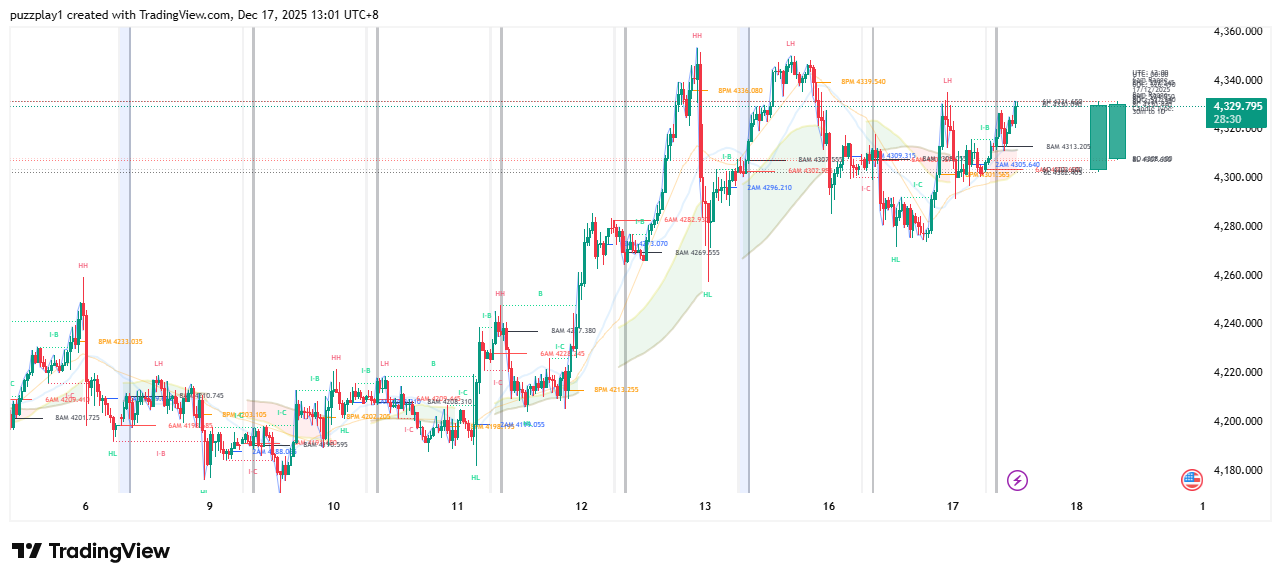

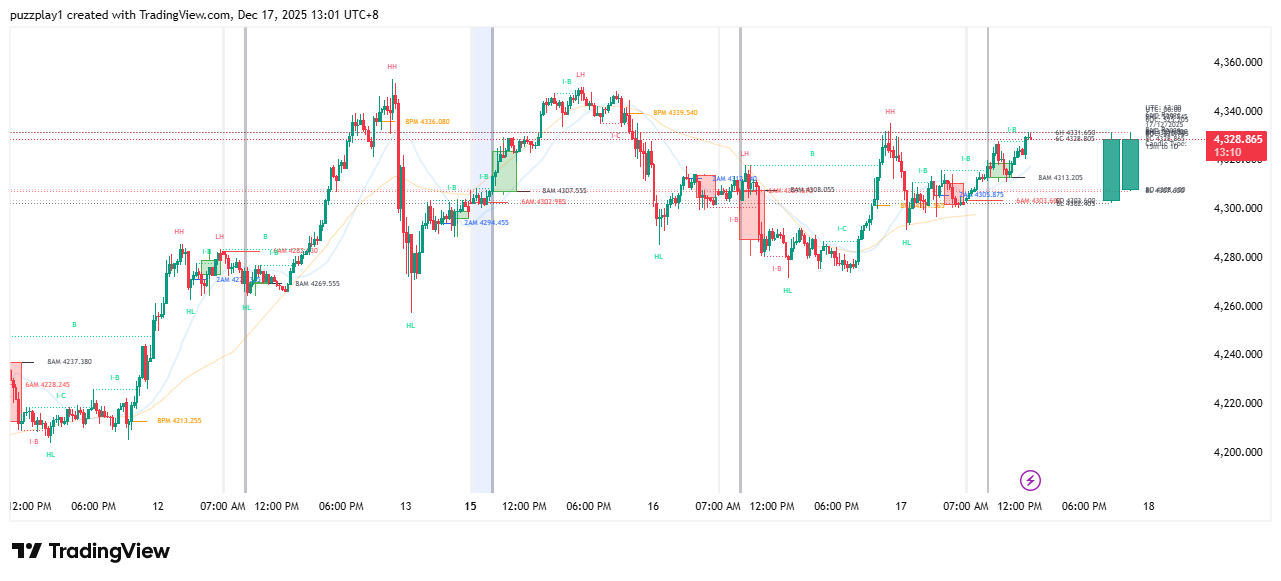

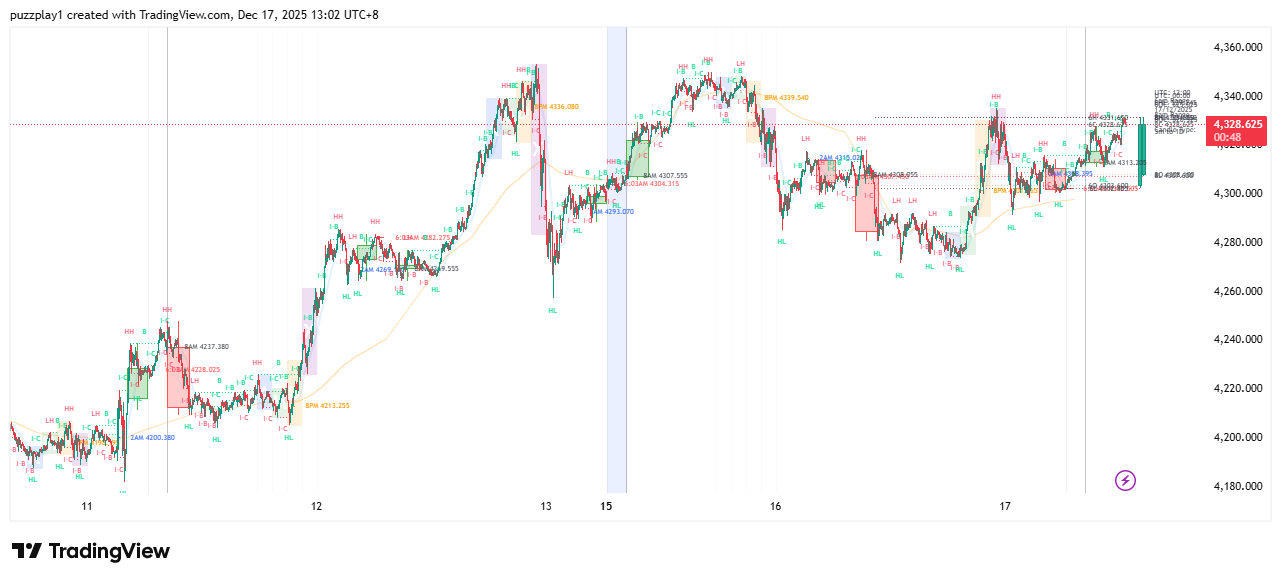